In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings('ignore')
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from xgboost import XGBClassifier


In [3]:
x_train = pd.read_csv('https://raw.githubusercontent.com/kayoyin/datasets/master/xtrain_clean.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/kayoyin/datasets/master/y_train.csv')
x_test = pd.read_csv('https://raw.githubusercontent.com/kayoyin/datasets/master/xtest_clean.csv')

In [4]:
# Turn all data types into categorical data types
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c): 
            df[n] = pd.factorize(df[n])[0]
    return df

In [5]:
x_train = train_cats(x_train)

In [6]:
y_num = y_train.replace(['functional','non functional', 'functional needs repair'], [0,1,2]) # replace labels by numerical values


In [7]:
#x_train.drop('id', axis = 1, inplace = True)
#y_train.drop('id', axis = 1, inplace = True)
x_test.drop('id', axis = 1, inplace = True)

In [8]:
xtrain, xvalid, ytrain, yvalid = train_test_split(x_train, y_num, test_size=0.2)

In [9]:
xtrain.head()

,Unnamed: 0,id,gps_height,longitude,latitude,basin,public_meeting,scheme_management,construction_year,extraction_type_class,...,water_quality,quantity,source,source_class,waterpoint_type,year_recorded,date_recordedMonth,date_recordedElapsed,population_log,age
15789,15789,64892,1274.974765,32.72,-4.137663,5,0,0,1989.0,2,...,0,3,5,0,2,2013,1,751,4.615121,24.0
19808,19808,14272,1498.280000,30.59,-2.553497,1,1,0,2004.0,0,...,0,1,0,0,0,2011,7,195,7.313887,7.0
12920,12920,14494,227.000000,39.64,-10.895129,3,1,5,1982.0,1,...,0,2,3,0,1,2013,1,753,0.693147,31.0
42328,42328,49243,672.521739,34.30,-8.674348,7,1,0,1993.0,0,...,0,0,6,1,0,2011,4,91,4.795791,18.0
25161,25161,57093,737.000000,35.48,-7.470317,7,1,0,2011.0,0,...,0,2,0,0,0,2011,3,67,0.693147,0.0


# Decision Tree Classifier

In [11]:
dtc = DecisionTreeClassifier(max_depth=5).fit(xtrain, ytrain)
pred1 = dtc.predict(xvalid)

In [12]:
print('Training accuracy: ', accuracy_score(ytrain, dtc.predict(xtrain)))
print('Validation accuracy: ', accuracy_score(yvalid, pred1))

ValueError: multiclass-multioutput is not supported

# Random Forest Classifier

In [35]:
rf = RandomForestClassifier(max_depth=100).fit(xtrain,ytrain)
pred2 = rf.predict(xvalid)

In [36]:
print('Training accuracy: ', accuracy_score(ytrain, rf.predict(xtrain)))
print('Validation accuracy: ', accuracy_score(yvalid, pred2))

Training ccuracy:  0.9840488215488216
Validation accuracy:  0.7871212121212121


# Support Vector Machine

In [38]:
svm = SVC().fit(xtrain,ytrain)
pred3 = svm.predict(xvalid)

In [39]:
print('Training accuracy: ', accuracy_score(ytrain, svm.predict(xtrain)))
print('Validation accuracy: ', accuracy_score(yvalid, pred3))

Training ccuracy:  1.0
Validation accuracy:  0.5353535353535354


# SGD

In [41]:
sgd = SGDClassifier(loss="hinge", penalty="l2").fit(xtrain,ytrain)
pred4 = sgd.predict(xvalid)

In [42]:
print('Training accuracy: ', accuracy_score(ytrain, sgd.predict(xtrain)))
print('Validation accuracy: ', accuracy_score(yvalid, pred4))

Training accuracy:  0.54503367003367
Validation accuracy:  0.5361111111111111


# KNN

In [44]:
knn = KNeighborsClassifier(n_neighbors=7).fit(xtrain,ytrain)
pred5 = knn.predict(xvalid)

In [45]:
print('Training accuracy: ', accuracy_score(ytrain, knn.predict(xtrain)))
print('Validation accuracy: ', accuracy_score(yvalid, pred5))

Training accuracy:  0.6333122895622896
Validation accuracy:  0.49595959595959593


# Naive Bayes

In [47]:
gnb = GaussianNB().fit(xtrain,ytrain)
pred6 = gnb.predict(xvalid)

In [48]:
print('Training accuracy: ', accuracy_score(ytrain, gnb.predict(xtrain)))
print('Validation accuracy: ', accuracy_score(yvalid, pred6))

Training accuracy:  0.6289772727272728
Validation accuracy:  0.6266835016835017


# Neural Network

In [49]:
mlp = MLPClassifier().fit(xtrain,ytrain)
pred7 = mlp.predict(xvalid)

In [50]:
print('Training accuracy: ', accuracy_score(ytrain, mlp.predict(xtrain)))
print('Validation accuracy: ', accuracy_score(yvalid, pred7))

Training accuracy:  0.4540824915824916
Validation accuracy:  0.4535353535353535


# Optimizing the Random Forest

In [54]:
param_grid = { 
    'n_estimators': [300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,10,30,50],
    'criterion' :['gini', 'entropy']
}

In [56]:
gridRF = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5)
gridRF.fit(xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [300, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 30, 50], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [57]:
gridRF.best_params_


{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [60]:
rf1 = RandomForestClassifier(max_depth=30, criterion = 'gini', max_features='sqrt', n_estimators=500).fit(xtrain,ytrain)
predrf1 = rf1.predict(xvalid)

In [61]:
print('Training accuracy: ', accuracy_score(ytrain, rf1.predict(xtrain)))
print('Validation accuracy: ', accuracy_score(yvalid, predrf1))

Training accuracy:  0.9999368686868687
Validation accuracy:  0.803030303030303


In [62]:
rf2 = RandomForestClassifier(max_depth=30, criterion = 'gini', max_features='sqrt', n_estimators=700).fit(xtrain,ytrain)
predrf2 = rf2.predict(xvalid)
print('Training accuracy: ', accuracy_score(ytrain, rf2.predict(xtrain)))
print('Validation accuracy: ', accuracy_score(yvalid, predrf2))


Training accuracy:  0.9998947811447811
Validation accuracy:  0.8035353535353535


In [34]:
rf3 = RandomForestClassifier(n_estimators=300, 
                                min_samples_split=8,
                                max_features='sqrt',
                                max_depth=95)
rf3.fit(xtrain,ytrain)
trainrf3 = rf3.predict(xtrain)
predrf3 = rf3.predict(xvalid)
print('Training accuracy: ', accuracy_score(ytrain, trainrf3))
print('Validation accuracy: ', accuracy_score(yvalid, predrf3))

Training accuracy:  0.9420454545454545
Validation accuracy:  0.8071548821548822


# Extremely Randomized Trees

In [ ]:
etc = ExtraTreesClassifier(n_estimators=300, 
                                min_samples_split=8,
                                max_features='sqrt',
                                max_depth=95)
etc.fit(xtrain,ytrain)
predetc = etc.predict(xvalid)


In [ ]:
print('Training accuracy: ', accuracy_score(ytrain, etc.predict(xtrain)))
print('Validation accuracy: ', accuracy_score(yvalid, predetc))

# XGBoost

In [32]:
#TODO perform grid search to find best hyperparameters (this has potential)
xgb = XGBClassifier(max_depth=9, n_estimators=300,
       objective='multi:softmax') #can also use softprob for multiclass
xgb.fit(xtrain,ytrain)
trainxgb = xgb.predict(xtrain)
predxgb = xgb.predict(xvalid)

In [20]:
#ytrain.drop('id', axis = 1, inplace = True)
yvalid.drop('id', axis = 1, inplace = True)

In [33]:
print('Training accuracy: ', accuracy_score(ytrain, trainxgb))
print('Validation accuracy: ', accuracy_score(yvalid, predxgb))

Training accuracy:  0.9380050505050505
Validation accuracy:  0.8010942760942761


# Stacking our best two models

TODO: code own stacker thing
plot correlation of two models (more uncorrelated is better askip)

In [38]:
stacker = LogisticRegression()
twotrain = pd.concat([pd.Series(trainrf3),pd.Series(trainxgb)], axis = 1)
twopred = pd.concat([pd.Series(predrf3),pd.Series(predxgb)], axis = 1)

stacker.fit(twotrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
stackerpred = stacker.predict(twopred)

In [40]:
print('Training accuracy: ', accuracy_score(ytrain, stacker.predict(twotrain)))
print('Validation accuracy: ', accuracy_score(yvalid, stackerpred))

Training accuracy:  0.9046506734006734
Validation accuracy:  0.7921717171717172


In [44]:
cm = confusion_matrix(predrf3,yvalid)

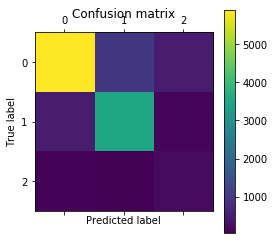

In [45]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [46]:
print(cm)

[[5894  992  521]
 [ 516 3480  134]
 [  87   41  215]]


In [47]:
cm2 = confusion_matrix(predxgb,yvalid)

In [48]:
print(cm2)

[[5902 1064  528]
 [ 509 3403  130]
 [  86   46  212]]


In [50]:
twotrain.corr()

,0,1
0,1.000000,0.875727
1,0.875727,1.000000


In [51]:
twopred.corr()

,0,1
0,1.000000,0.836915
1,0.836915,1.000000
